# Prediksi Pesanan dalam Toko Daring Menggunakan Data Mining: Studi Kasus DATA MINING CUP 2013

# Kelompok 8
1. Hasbi Haqqul Fikri (2309245)
2. Naeya Adeani Putri (2304017)
3. Ririn Marchelina (2303662)
4. Muhammad Ichsan Khairullah (2306924)
5. Ismail Fatih Raihan (2307840)

# Pendahuluan

Kompetisi DATA MINING CUP (DMC) 2013 berfokus pada prediksi pesanan dalam sebuah toko daring (online shop). Dalam konteks ini, memprediksi kemungkinan terjadinya pesanan dapat memberikan keuntungan strategis bagi pengelola toko. Sebagai contoh, jika probabilitas pesanan tinggi, sistem dapat merekomendasikan produk-produk terlaris untuk meningkatkan penjualan. Sebaliknya, jika probabilitas rendah, sistem dapat menawarkan kupon diskon untuk mendorong pelanggan melakukan pembelian. Untuk mencapai prediksi yang akurat, berbagai metode data mining digunakan untuk menghitung probabilitas pesanan berdasarkan data transaksi yang terjadi selama sesi kunjungan pengguna.


Skenario yang dihadapi dalam kompetisi ini adalah sesi kunjungan pengguna ke sebuah toko daring, di mana pengguna mungkin akan melihat-lihat halaman produk, menambahkan atau menghapus produk dari keranjang belanja, dan pada akhir sesi mungkin melakukan pesanan. Tugas utama DMC tahun ini adalah untuk memprediksi apakah pengunjung akan melakukan pesanan atau tidak berdasarkan data transaksi yang terkumpul selama sesi tersebut.


Kompetisi DMC 2013 terdiri dari dua tugas utama. Tugas pertama adalah memprediksi hasil pesanan menggunakan data historis toko yang mencakup aktivitas sesi dan informasi apakah pesanan dilakukan atau tidak. Ini merupakan masalah klasik dalam data mining. Tugas kedua adalah skenario daring di mana peserta diharuskan mengimplementasikan agen yang mampu mempelajari pola transaksi secara adaptif dan memprediksi hasil pesanan secara real-time setelah setiap transaksi terjadi.

# Penjelasan Field

1. **sessionNo**: Nomor sesi yang berjalan, berfungsi sebagai ID unik untuk setiap sesi.
2. **starHour**: Jam ketika sesi dimulai, dalam format 0-23.
3. **starWeekday**: Hari dalam minggu ketika sesi dimulai (1 = Senin, ..., 7 = Minggu).
4. **duration**: Durasi sesi dalam detik.
5. **cCount**: Jumlah produk yang diklik selama sesi.
6. **cMinPrice**: Harga minimum dari produk yang diklik.
7. **cMaxPrice**: Harga maksimum dari produk yang diklik.
8. **cSumPrice**: Total harga dari semua produk yang diklik.
9. **bCount**: Jumlah produk yang dimasukkan ke keranjang.
10. **bMinPrice**: Harga minimum dari produk yang dimasukkan ke keranjang.
11. **bMaxPrice**: Harga maksimum dari produk yang dimasukkan ke keranjang.
12. **bSumPrice**: Total harga dari semua produk yang dimasukkan ke keranjang.
13. **bStep**: Tahap proses pembelian dalam sesi.
14. **onlineStatus**: Status online pelanggan selama sesi (misalnya, "online", "offline").
15. **availability**: Status ketersediaan produk selama sesi.
16. **customerNo**: Nomor pelanggan yang unik.
17. **maxVal**: Harga maksimum yang diperbolehkan untuk pembelian oleh pelanggan.
18. **customerScore**: Penilaian pelanggan dari sudut pandang toko.
19. **accountLifetime**: Lama akun pelanggan aktif dalam bulan.
20. **payments**: Jumlah pembayaran yang dilakukan oleh pelanggan.
21. **age**: Usia Pelanggan.
22. **address**: Tipe alamat pelanggan (misalnya, kode untuk Mr, Mrs, Company).
23. **lastOrder**: Waktu dalam hari sejak pesanan terakhir pelanggan.
24. **order**: Status hasil sesi (misalnya, "y" untuk pembelian, "n" untuk non-pembelian).

# Import Libraries

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import xgboost as xgb

# Menghubungkan Ke Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data Set

In [ ]:
df_data_train = pd.read_csv("/content/drive/MyDrive/DataMining/DataTugas2/transact_train.txt", delimiter='|')
df_data_class = pd.read_csv("/content/drive/MyDrive/DataMining/DataTugas2/transact_class.txt", delimiter='|')
df_data_real = pd.read_csv("/content/drive/MyDrive/DataMining/DataTugas2/realclass_t1.txt", delimiter='|')

#EDA

##Data Exploration

In [ ]:
 # mengganti char ? menjadi  null value
df_data_train.replace('?', pd.NA, inplace=True)

# Convert appropriate columns to numeric, errors='coerce' will turn conversion errors into NaN
columns_to_convert = ['cMinPrice', 'cMaxPrice', 'cSumPrice', 'bMinPrice', 'bMaxPrice', 'bSumPrice',
                      'bStep', 'customerNo', 'maxVal', 'customerScore', 'accountLifetime',
                      'payments', 'age', 'address', 'lastOrder']

df_data_train[columns_to_convert] = df_data_train[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Calculate the number and percentage of missing values in each column
missing_values_count = df_data_train.isnull().sum()
missing_values_percentage = (missing_values_count / len(df_data_train)) * 100

missing_values_summary = pd.DataFrame({
    "Missing Values": missing_values_count,
    "Percentage (%)": missing_values_percentage
})

missing_values_summary.sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage (%)
bStep,191333,44.598415
availability,165255,38.519812
onlineStatus,160379,37.383249
customerScore,153740,35.835744
accountLifetime,153740,35.835744
maxVal,153740,35.835744
age,151396,35.289374
address,151098,35.219912
lastOrder,151098,35.219912
customerNo,151098,35.219912


In [ ]:
# Melihat distribusi kategori di kolom onlineStatus dan availability
online_status_counts = df_data_train['onlineStatus'].value_counts(dropna=False)
availability_counts = df_data_train['availability'].value_counts(dropna=False)

print("Distribusi Online Status:")
print(online_status_counts)
print("\nDistribusi Availability:")
print(availability_counts)

Distribusi Online Status:
onlineStatus
y       265625
<NA>    160379
n         3009
Name: count, dtype: int64

Distribusi Availability:
availability
completely orderable           253692
<NA>                           165255
mainly orderable                 5756
completely not orderable         1491
mixed                            1284
completely not determinable      1017
mainly not orderable              320
mainly not determinable           198
Name: count, dtype: int64


In [ ]:
df_data_train.head(500)

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.99,59.99,59.99,1,59.99,...,<NA>,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
1,1,6,5,11.940,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
2,1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
3,2,6,5,0.000,0,NaN,NaN,NaN,0,NaN,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
4,2,6,5,15.633,0,NaN,NaN,NaN,0,NaN,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,66,6,5,438.157,0,NaN,NaN,NaN,0,NaN,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
496,66,6,5,454.460,1,NaN,NaN,NaN,1,NaN,...,<NA>,32.0,3000.0,570.0,224.0,7.0,51.0,2.0,212.0,y
497,66,6,5,458.102,1,NaN,NaN,NaN,1,NaN,...,mainly orderable,32.0,3000.0,570.0,224.0,7.0,51.0,2.0,212.0,y
498,66,6,5,475.089,1,NaN,NaN,NaN,1,NaN,...,completely orderable,32.0,3000.0,570.0,224.0,7.0,51.0,2.0,212.0,y


###Statistik dasar dari datasetnya

In [ ]:
# 1. Jumlah record data
print('1. Jumlah record data = {}, dan jumlah kolom = 24'.format(df_data_train.shape[0]))
# 2. Tampilkan jumlah orang yang order (y) dan tidak order (n)
print("\n2. Jumlah Order (y) dan jumlah Tidak Order (n)")
print(df_data_train.loc[:, 'order'].value_counts())
print("3. Data Order bersifat Imbalance, yaitu data Order (y) lebih banyak dari yang Tidak Order (n)")

1. Jumlah record data = 429013, dan jumlah kolom = 24

2. Jumlah Order (y) dan jumlah Tidak Order (n)
order
y    290030
n    138983
Name: count, dtype: int64
3. Data Order bersifat Imbalance, yaitu data Order (y) lebih banyak dari yang Tidak Order (n)


##Heatmap yang menunjukkan koefisien korelasi antara berbagai fitur dalam dataset

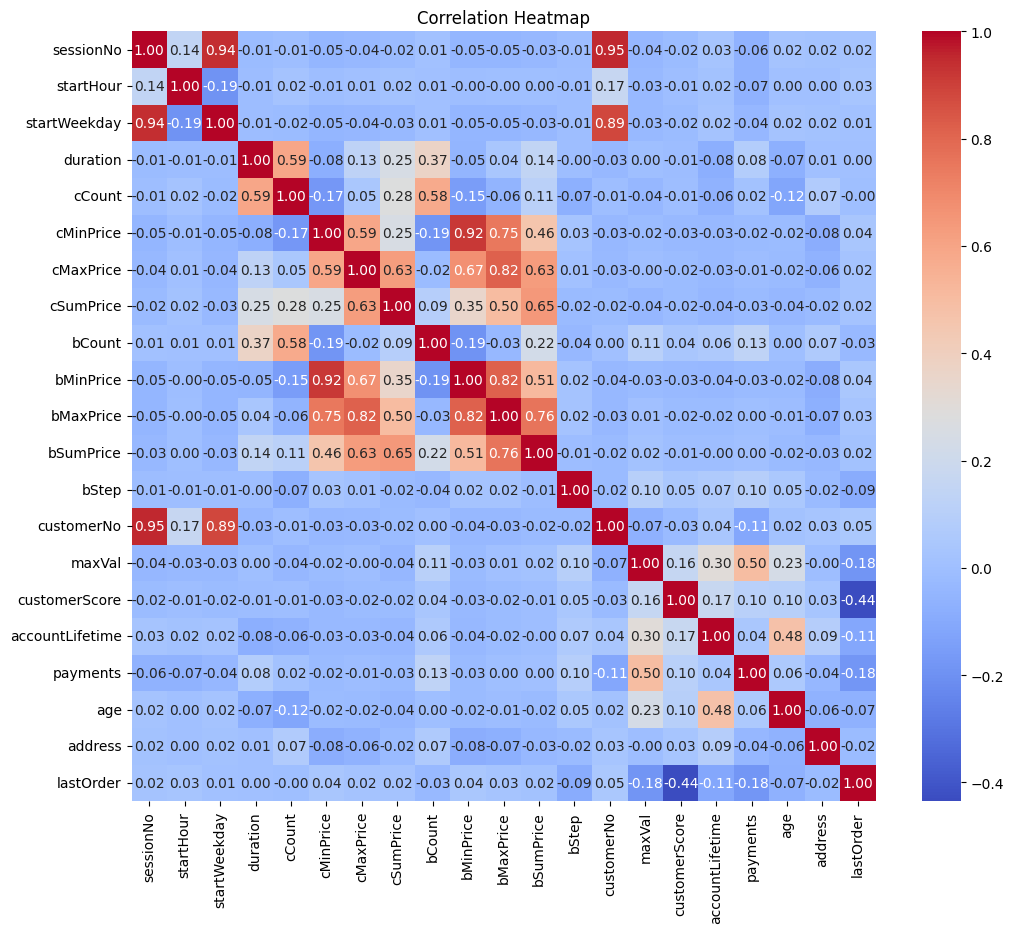

In [ ]:
# Menampilkan Heatmap untuk mencari korelasi antar kolom, bagaimana pola menarik yang ada pada dataset ini
df_numerik = df_data_train.select_dtypes(include=['number'])
correlation_matrix = df_numerik.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

###Kesimpulan
####Heatmap korelasi ini menunjukkan seberapa kuat hubungan antara berbagai variabel dalam data. Warna merah tua menunjukkan korelasi positif yang kuat (artinya ketika satu variabel naik, variabel lainnya cenderung naik juga), sedangkan warna biru tua menunjukkan korelasi negatif yang kuat (artinya ketika satu variabel naik, variabel lainnya cenderung turun). Warna putih menandakan tidak ada korelasi yang signifikan.
####Variabel harga (cMinPrice, cMaxPrice, cSumPrice, bMinPrice, bMaxPrice, bSumPrice) memiliki korelasi yang sangat kuat satu sama lain. Ini masuk akal karena harga minimum, maksimum, dan total biasanya saling terkait.
####Durasi sesi (duration) memiliki korelasi positif dengan jumlah produk yang dibeli (cCount, bCount). Ini berarti semakin lama seseorang berbelanja, semakin banyak produk yang cenderung mereka beli.
####Variabel pelanggan (customerNo, customerScore, accountLifetime) memiliki korelasi positif dengan jumlah pembayaran (payments). Ini menunjukkan bahwa pelanggan yang sudah lama dan sering melakukan transaksi cenderung memiliki skor pelanggan yang lebih tinggi.


##Diagram batang untuk menunjukkan jumlah nilai 'y' dan 'n' di kolom "Order

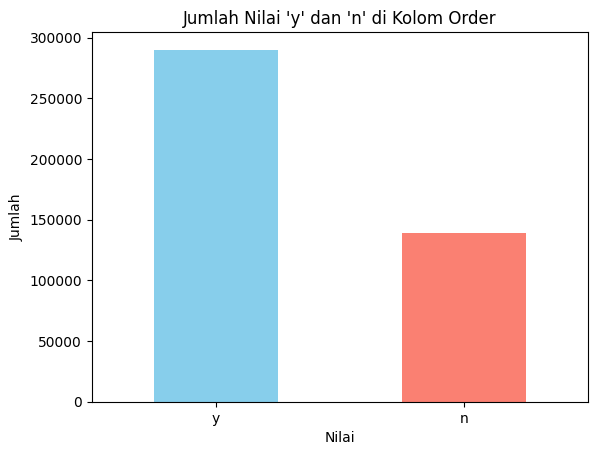

In [ ]:
# Menghitung jumlah masing-masing nilai 'y' dan 'n' di kolom 'order'
order_counts = df_data_train['order'].value_counts()

# Membuat plot batang
order_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Jumlah Nilai 'y' dan 'n' di Kolom Order")
plt.xlabel("Nilai")
plt.ylabel("Jumlah")
plt.xticks(rotation=0)  # Menjaga label sumbu x tetap horizontal
plt.show()

###Kesimpulan
####Grafik di atas menunjukkan bahwa sebagian besar data dalam kolom "Order" bernilai "y", sedangkan hanya sebagian kecil yang bernilai "n". Ini artinya, sebagian besar transaksi atau pesanan yang tercatat dalam data ini berhasil (diwakili oleh nilai "y"), sementara hanya sebagian kecil yang gagal atau tidak memenuhi syarat (diwakili oleh nilai "n"). Dari visualisasi ini, kita bisa menyimpulkan bahwa tingkat keberhasilan transaksi secara keseluruhan cukup tinggi.

##Histogram untuk menunjukkan distribusi durasi sesi dalam satuan detik

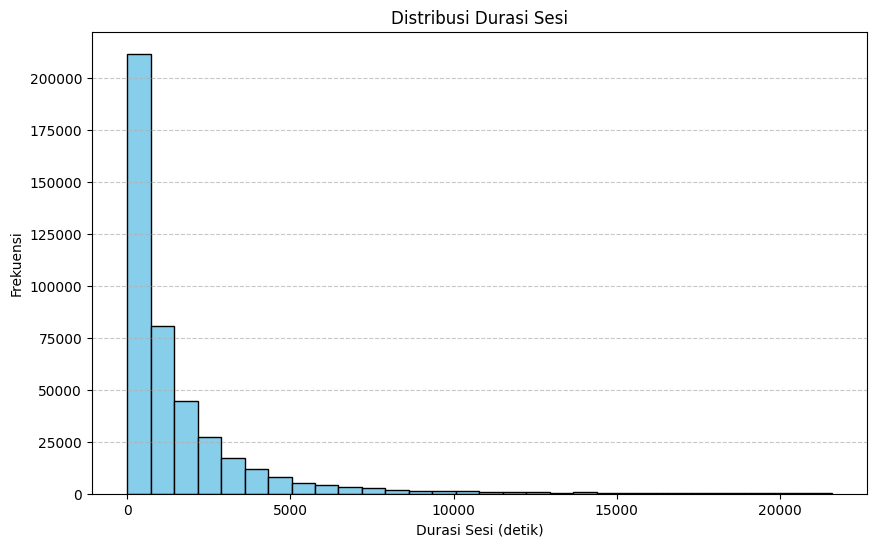

In [ ]:
# Ubah kolom duration ke tipe numerik, sambil menangani nilai yang bukan angka
df_data_train['duration'] = pd.to_numeric(df_data_train['duration'], errors='coerce')

# Buat histogram untuk duration: Plot histogram untuk melihat distribusi durasi sesi.
plt.figure(figsize=(10, 6))
plt.hist(df_data_train['duration'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("Distribusi Durasi Sesi")
plt.xlabel("Durasi Sesi (detik)")
plt.ylabel("Frekuensi")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# histogram untuk melihat distribusi waktu yang dihabiskan pengguna dalam satu sesi.
# banyak pengguna umumnya menghabiskan waktu singkat, dengan beberapa pengguna menghabiskan waktu lebih lama.

###Kesimpulan
####Grafik ini menunjukkan bahwa sebagian besar durasi sesi berada di rentang yang sangat pendek (dekat dengan 0 detik), yang ditunjukkan oleh frekuensi tertinggi pada durasi sesi pendek. Distribusi durasi sesi tampak miring ke kanan, yang berarti hanya sedikit sesi yang memiliki durasi sangat panjang, sedangkan sebagian besar sesi berlangsung singkat.

##Plot batang untuk menunjukkan perbandingan antara rata-rata jumlah klik produk dan rata-rata jumlah produk yang ditambahkan ke keranjang

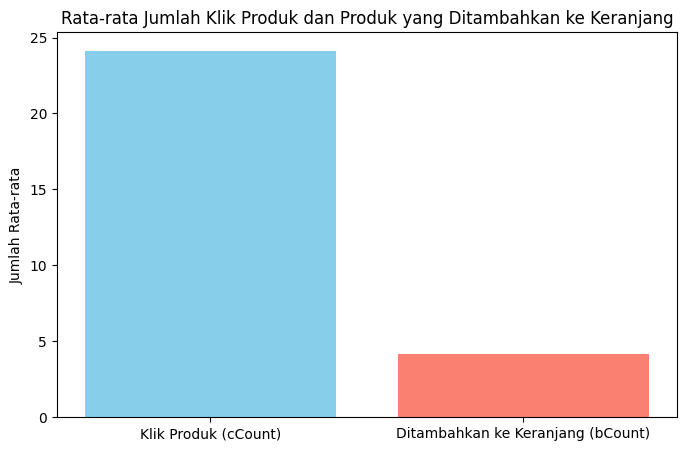

In [ ]:
# Konversi kolom 'cCount' dan 'bCount' ke numerik
df_data_train['cCount'] = pd.to_numeric(df_data_train['cCount'], errors='coerce')
df_data_train['bCount'] = pd.to_numeric(df_data_train['bCount'], errors='coerce')

# Menghitung rata-rata
avg_cCount = df_data_train['cCount'].mean()
avg_bCount = df_data_train['bCount'].mean()

# Plot batang untuk rata-rata cCount dan bCount
plt.figure(figsize=(8, 5))
plt.bar(['Klik Produk (cCount)', 'Ditambahkan ke Keranjang (bCount)'], [avg_cCount, avg_bCount], color=['skyblue', 'salmon'])
plt.title('Rata-rata Jumlah Klik Produk dan Produk yang Ditambahkan ke Keranjang')
plt.ylabel('Jumlah Rata-rata')
plt.show()

# Banyak pengguna yang hanya melihat-lihat produk dan tidak memasukkannya kedalam keranjang mereka

###Kesimpulan
####Berdasarkan plot tersebut, dapat disimpulkan bahwa jumlah rata-rata klik pada produk (cCount) jauh lebih tinggi dibandingkan dengan jumlah rata-rata produk yang ditambahkan ke keranjang (bCount). Hal ini menunjukkan bahwa meskipun banyak produk yang dilihat oleh pelanggan, hanya sebagian kecil yang benar-benar dimasukkan ke keranjang untuk pembelian. Fenomena ini mengindikasikan bahwa ada kemungkinan besar pelanggan hanya menjelajahi produk tanpa niat langsung untuk membeli atau terdapat faktor-faktor lain yang memengaruhi keputusan pembelian, seperti harga, deskripsi produk, atau ulasan.

##Plot batang untuk menunjukkan distribusi frekuensi usia pelanggan

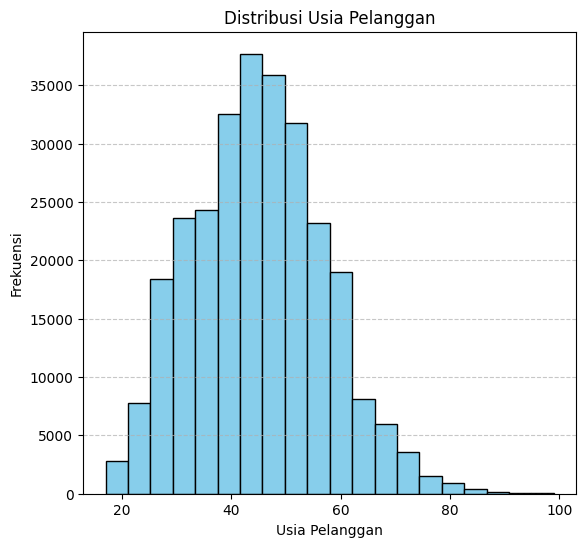

In [ ]:
# Konversi kolom 'age' dan 'payments' ke tipe numerik, menangani nilai non-numerik
df_data_train['age'] = pd.to_numeric(df_data_train['age'], errors='coerce')

# Mengatur ukuran figure
plt.figure(figsize=(14, 6))

# Histogram distribusi usia pelanggan
plt.subplot(1, 2, 1)
plt.hist(df_data_train['age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Usia Pelanggan')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# menampilkan rentang usia para pelanggan, ini bisa membantu mengetahui daya beli, minat terhadap produk, serta behaviour yang dapat membantu prediksi

###Kesimpulan
####Berdasarkan analisis di atas, dapat disimpulkan bahwa target pasar utama dari produk atau layanan ini adalah kelompok usia produktif, khususnya antara 30 hingga 50 tahun. Hal ini dapat memungkinan sebagai target utama layanan atau produk

##Plot unutk menganalisis pembelian berdasarkan status online

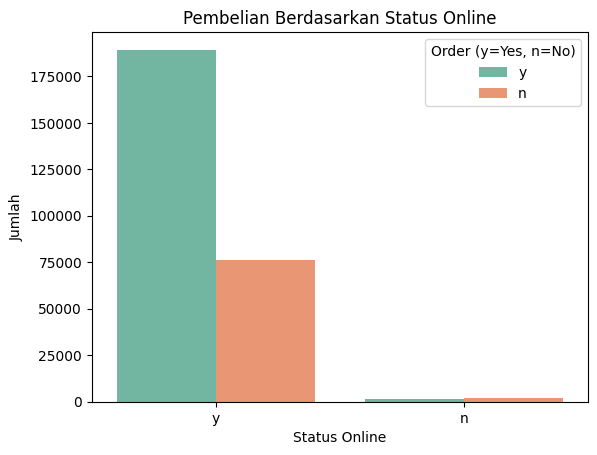

In [ ]:
sns.countplot(x='onlineStatus', hue='order', data=df_data_train, palette='Set2')
plt.title('Pembelian Berdasarkan Status Online')
plt.xlabel('Status Online')
plt.ylabel('Jumlah')
plt.legend(title='Order (y=Yes, n=No)')
plt.show()

# bisa dilihat bahwa ada beberapa order yang terjadi namun dalam kondisi atau status tidak online. hal ini bisa terjadi karena beberapa faktor:
# 1. kesalahan pencatatan dalam dataset, Misalnya, sistem mencatat status sebagai "offline" pada saat pembelian, padahal pengguna terhubung.
# 2. pemprosesan pesanan otomatis setelah pengguna melakukan tindakan awal, seperti "pre-order" atau "order confirmation."
# 3. Jika platform mendukung fitur seperti "cash on delivery", maka status pengguna di platform mungkin tetap offline.

###Kesimpulan
####Berdasarkan plot yang disajikan, dapat disimpulkan bahwa mayoritas pembelian berhasil dilakukan ketika status online aktif ("y"). Hal ini ditunjukkan oleh batang biru (order berhasil) yang jauh lebih tinggi dibandingkan dengan batang oranye (order tidak berhasil) pada status online yang sama. Selain itu, pembelian yang dilakukan pada status online tidak aktif ("n") sangat minim, baik untuk order berhasil maupun tidak berhasil.

# Prediksi

##Model Random Forest

####Model ini dapat digunakan untuk memprediksi apakah seorang pelanggan akan melakukan order atau tidak berdasarkan fitur-fitur yang diberikan

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# 1. Data Preparation and Preprocessing

# Memisahkan data fitur (X) dan target (y) dalam data pelatihan
X = df_data_train.drop('order', axis=1)  # Menghapus kolom 'order' dari data pelatihan
y = df_data_train['order'].map({'n': 0, 'y': 1})  # Mengonversi target 'order' menjadi angka: 'n' -> 0, 'y' -> 1

# Memproses data pelatihan: one-hot encoding untuk fitur kategorikal, konversi tipe data, dan penanganan nilai yang hilang
categorical_features = ['onlineStatus', 'availability']
X = pd.get_dummies(X, columns=categorical_features)  # Melakukan one-hot encoding pada fitur kategorikal

# Mengonversi kolom numerik ke tipe data numerik pada data pelatihan
for col in ['cMinPrice', 'cMaxPrice', 'cSumPrice', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 'bStep',
            'customerNo', 'maxVal', 'customerScore', 'accountLifetime', 'payments', 'age', 'address', 'lastOrder']:
    X[col] = pd.to_numeric(X[col], errors='coerce')  # Mengonversi kolom menjadi angka, jika gagal set menjadi NaN

# Mengisi nilai NaN pada data pelatihan dengan 0
X = X.fillna(0)

# Mempersiapkan Data Uji
X_test = df_data_class.copy()  # Menyalin data uji untuk diproses lebih lanjut

# Memproses data uji dengan cara yang sama seperti data pelatihan
X_test = pd.get_dummies(X_test, columns=categorical_features)  # One-hot encoding pada fitur kategorikal

# Mengonversi kolom numerik ke tipe data numerik pada data uji
for col in ['cMinPrice', 'cMaxPrice', 'cSumPrice', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 'bStep',
            'customerNo', 'maxVal', 'customerScore', 'accountLifetime', 'payments', 'age', 'address', 'lastOrder']:
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')  # Mengonversi kolom menjadi angka, jika gagal set menjadi NaN

# Mengisi nilai NaN pada data uji dengan 0
X_test = X_test.fillna(0)

# Menyelaraskan kolom antara data pelatihan dan data uji (kolom yang hilang ditambahkan, kolom yang ekstra dihapus)
missing_cols = set(X.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0  # Menambahkan kolom yang hilang pada data uji

extra_cols = set(X_test.columns) - set(X.columns)
for col in extra_cols:
    X_test = X_test.drop(columns=[col])  # Menghapus kolom ekstra pada data uji

X_test = X_test[X.columns]  # Menyusun ulang kolom agar urutannya sama dengan data pelatihan

# 2. Model Training

# Membuat dan melatih model XGBoost
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=3, learning_rate=0.1)
model.fit(X, y)

# 3. Prediction and Evaluation

# Melakukan prediksi pada data uji
predictions = model.predict(X_test)

# Membuat DataFrame dengan sessionNo dan prediksi
df_predictions = df_data_class.copy()
df_predictions['prediction'] = predictions

# Menggabungkan dengan df_data_real untuk perbandingan (diasumsikan df_data_real berisi data kebenaran)
df_comparison = df_predictions.merge(df_data_real, on='sessionNo', how='left', suffixes=('_model', '_real'))

# Mencetak classification report
report = classification_report(df_comparison['prediction_real'], df_comparison['prediction_model'])
print(report)

# Menampilkan akurasi pelatihan
training_accuracy = model.score(X, y)
print(f"Training Accuracy: {training_accuracy}")

# Menghitung akurasi keseluruhan
accuracy = accuracy_score(df_comparison['prediction_real'], df_comparison['prediction_model'])
print(f"Overall Accuracy: {accuracy}")

# Hapus duplikat berdasarkan 'sessionNo', simpan baris pertama untuk setiap 'sessionNo'
df_predictions = df_predictions[['sessionNo', 'prediction']].drop_duplicates(subset=['sessionNo'], keep='first')

# Simpan hasil ke file TXT
df_predictions[['sessionNo', 'prediction']].to_csv('prediksi_sebelum_cleaning_RF.txt', sep='\t', index=False)


              precision    recall  f1-score   support

           0       0.68      0.52      0.59     14394
           1       0.80      0.88      0.84     30674

    accuracy                           0.77     45068
   macro avg       0.74      0.70      0.71     45068
weighted avg       0.76      0.77      0.76     45068

Training Accuracy: 0.7562125157046523
Overall Accuracy: 0.7674846898020768


###Output
####Akurasi: Model mencapai akurasi sebesar 0.751, artinya model dapat memprediksi dengan benar sekitar 75% dari data uji.
####Prediksi untuk Kelas: Model lebih baik dalam memprediksi kelas 1 (dengan f1-score 0.83) dibandingkan kelas 0 (dengan f1-score 0.56), menunjukkan performa yang lebih unggul pada kelas mayoritas.

## Model XGBoost

###Model ini untuk memprediksi apakah pelanggan akan melakukan order (y) atau tidak (n)

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# 1. Data Preparation and Preprocessing

# Memisahkan data fitur (X) dan target (y) dalam data pelatihan
X = df_data_train.drop('order', axis=1)  # Menghapus kolom 'order' dari data pelatihan
y = df_data_train['order'].map({'n': 0, 'y': 1})  # Mengonversi target 'order' menjadi angka: 'n' -> 0, 'y' -> 1

# Memproses data pelatihan: one-hot encoding untuk fitur kategorikal, konversi tipe data, dan penanganan nilai yang hilang
categorical_features = ['onlineStatus', 'availability']
X = pd.get_dummies(X, columns=categorical_features)  # Melakukan one-hot encoding pada fitur kategorikal

# Mengonversi kolom numerik ke tipe data numerik pada data pelatihan
for col in ['cMinPrice', 'cMaxPrice', 'cSumPrice', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 'bStep',
            'customerNo', 'maxVal', 'customerScore', 'accountLifetime', 'payments', 'age', 'address', 'lastOrder']:
    X[col] = pd.to_numeric(X[col], errors='coerce')  # Mengonversi kolom menjadi angka, jika gagal set menjadi NaN

# Mengisi nilai NaN pada data pelatihan dengan 0
X = X.fillna(0)

# Mempersiapkan Data Uji
X_test = df_data_class.copy()  # Menyalin data uji untuk diproses lebih lanjut

# Memproses data uji dengan cara yang sama seperti data pelatihan
X_test = pd.get_dummies(X_test, columns=categorical_features)  # One-hot encoding pada fitur kategorikal

# Mengonversi kolom numerik ke tipe data numerik pada data uji
for col in ['cMinPrice', 'cMaxPrice', 'cSumPrice', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 'bStep',
            'customerNo', 'maxVal', 'customerScore', 'accountLifetime', 'payments', 'age', 'address', 'lastOrder']:
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')  # Mengonversi kolom menjadi angka, jika gagal set menjadi NaN

# Mengisi nilai NaN pada data uji dengan 0
X_test = X_test.fillna(0)

# Menyelaraskan kolom antara data pelatihan dan data uji (kolom yang hilang ditambahkan, kolom yang ekstra dihapus)
missing_cols = set(X.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0  # Menambahkan kolom yang hilang pada data uji

extra_cols = set(X_test.columns) - set(X.columns)
for col in extra_cols:
    X_test = X_test.drop(columns=[col])  # Menghapus kolom ekstra pada data uji

X_test = X_test[X.columns]  # Menyusun ulang kolom agar urutannya sama dengan data pelatihan

# 2. Model Training

# Membuat dan melatih model XGBoost
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=3, learning_rate=0.1)
model.fit(X, y)

# 3. Prediction and Evaluation

# Melakukan prediksi pada data uji
predictions = model.predict(X_test)

# Membuat DataFrame dengan sessionNo dan prediksi
df_predictions = df_data_class.copy()
df_predictions['prediction'] = predictions

# Menggabungkan dengan df_data_real untuk perbandingan (diasumsikan df_data_real berisi data kebenaran)
df_comparison = df_predictions.merge(df_data_real, on='sessionNo', how='left', suffixes=('_model', '_real'))

# Mencetak classification report
report = classification_report(df_comparison['prediction_real'], df_comparison['prediction_model'])
print(report)

# Menampilkan akurasi pelatihan
training_accuracy = model.score(X, y)
print(f"Training Accuracy: {training_accuracy}")

# Menghitung akurasi keseluruhan
accuracy = accuracy_score(df_comparison['prediction_real'], df_comparison['prediction_model'])
print(f"Overall Accuracy: {accuracy}")

# Hapus duplikat berdasarkan 'sessionNo', simpan baris pertama untuk setiap 'sessionNo'
df_predictions = df_predictions[['sessionNo', 'prediction']].drop_duplicates(subset=['sessionNo'], keep='first')

# Simpan hasil ke file TXT
df_predictions[['sessionNo', 'prediction']].to_csv('prediksi_sebelum_cleaning_XGboost.txt', sep='\t', index=False)


              precision    recall  f1-score   support

           0       0.68      0.52      0.59     14394
           1       0.80      0.88      0.84     30674

    accuracy                           0.77     45068
   macro avg       0.74      0.70      0.71     45068
weighted avg       0.76      0.77      0.76     45068

Training Accuracy: 0.7562125157046523
Overall Accuracy: 0.7674846898020768


###Output
####Akurasi: Model mencapai akurasi sebesar 0.767, artinya model dapat memprediksi dengan benar sekitar 77% dari data uji.
####Prediksi untuk Kelas: Model lebih baik dalam memprediksi kelas 1 (dengan f1-score 0.84) dibandingkan kelas 0 (dengan f1-score 0.59), menunjukkan performa yang lebih unggul pada kelas mayoritas.
####Akurasi Training: Model memiliki akurasi training sebesar 0.756, menunjukkan performa yang konsisten antara data training dan data uji.

# Data Cleaning

## Availability

In [ ]:
# Memastikan kolom 'availability' memiliki nilai NaN sebelum menghitung modus
if df_data_train['availability'].isna().any():
    # Menghitung modus dari kolom 'availability'
    mode_availability = df_data_train['availability'].mode().iloc[0]

    # Mengisi nilai NaN pada kolom 'availability' dengan nilai modus
    df_data_train['availability'] = df_data_train['availability'].fillna(mode_availability)


In [ ]:
# Melihat distribusi kategori di kolom onlineStatus dan availability
online_status_counts = df_data_train['onlineStatus'].value_counts(dropna=False)
availability_counts = df_data_train['availability'].value_counts(dropna=False)

print("Distribusi Online Status:")
print(online_status_counts)
print("\nDistribusi Availability:")
print(availability_counts)

Distribusi Online Status:
onlineStatus
y       265625
<NA>    160379
n         3009
Name: count, dtype: int64

Distribusi Availability:
availability
completely orderable           418947
mainly orderable                 5756
completely not orderable         1491
mixed                            1284
completely not determinable      1017
mainly not orderable              320
mainly not determinable           198
Name: count, dtype: int64


In [ ]:
df_data_train.head(500)

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
1,1,6,5,11.940,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
2,1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
3,2,6,5,0.000,0,NaN,NaN,NaN,0,NaN,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
4,2,6,5,15.633,0,NaN,NaN,NaN,0,NaN,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,66,6,5,438.157,0,NaN,NaN,NaN,0,NaN,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
496,66,6,5,454.460,1,NaN,NaN,NaN,1,NaN,...,completely orderable,32.0,3000.0,570.0,224.0,7.0,51.0,2.0,212.0,y
497,66,6,5,458.102,1,NaN,NaN,NaN,1,NaN,...,mainly orderable,32.0,3000.0,570.0,224.0,7.0,51.0,2.0,212.0,y
498,66,6,5,475.089,1,NaN,NaN,NaN,1,NaN,...,completely orderable,32.0,3000.0,570.0,224.0,7.0,51.0,2.0,212.0,y


Kesimpulan

Memeriksa apakah terdapat nilai NaN pada kolom 'availability' dalam dataframe df_data_train. Jika terdapat nilai NaN, kode akan melanjutkan untuk menghitung modus dari kolom tersebut menggunakan df_data_train['availability'].mode().iloc[0], yang mengambil nilai paling sering muncul. Setelah nilai modus diperoleh, kode mengisi seluruh nilai NaN dalam kolom 'availability' dengan nilai modus tersebut menggunakan metode fillna() dengan inplace=True, sehingga perubahan ini langsung diterapkan pada dataframe asli.

## cPrice

In [ ]:
#print(df_data_train[['cCount', 'cMinPrice', 'cMaxPrice', 'cSumPrice']].head(50))

# Menghitung mean untuk cMinPrice dan cMaxPrice, serta median untuk cSumPrice
mean_cMinPrice = df_data_train['cMinPrice'].mean()
mean_cMaxPrice = df_data_train['cMaxPrice'].mean()
median_cSumPrice = df_data_train['cSumPrice'].median()

# Ganti NaN di cMinPrice, cMaxPrice, dan cSumPrice jika cCount > 0
df_data_train.loc[(df_data_train['cCount'] > 0) & (df_data_train['cMinPrice'].isna()), 'cMinPrice'] = mean_cMinPrice
df_data_train.loc[(df_data_train['cCount'] > 0) & (df_data_train['cMaxPrice'].isna()), 'cMaxPrice'] = mean_cMaxPrice
df_data_train.loc[(df_data_train['cCount'] > 0) & (df_data_train['cSumPrice'].isna()), 'cSumPrice'] = median_cSumPrice

# Ganti variabel-variabel cPrice dengan 0 jika cCount = 0
df_data_train.loc[df_data_train['cCount'] == 0, ['cMinPrice', 'cMaxPrice', 'cSumPrice']] = 0

# Menampilkan beberapa baris pertama untuk memverifikasi pengisian nilai NaN
print(df_data_train[['cCount', 'cMinPrice', 'cMaxPrice', 'cSumPrice']].head(100))

    cCount  cMinPrice  cMaxPrice  cSumPrice
0        1      59.99      59.99      59.99
1        1      59.99      59.99      59.99
2        1      59.99      59.99      59.99
3        0       0.00       0.00       0.00
4        0       0.00       0.00       0.00
..     ...        ...        ...        ...
95      21       5.99      59.99     456.77
96      21       5.99      59.99     456.77
97       0       0.00       0.00       0.00
98       0       0.00       0.00       0.00
99       0       0.00       0.00       0.00

[100 rows x 4 columns]


In [ ]:
df_data_train.head(500)

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.990000,59.990000,59.99,1,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
1,1,6,5,11.940,1,59.990000,59.990000,59.99,1,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
2,1,6,5,39.887,1,59.990000,59.990000,59.99,1,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
3,2,6,5,0.000,0,0.000000,0.000000,0.00,0,NaN,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
4,2,6,5,15.633,0,0.000000,0.000000,0.00,0,NaN,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,66,6,5,438.157,0,0.000000,0.000000,0.00,0,NaN,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
496,66,6,5,454.460,1,55.289127,146.663005,388.00,1,NaN,...,completely orderable,32.0,3000.0,570.0,224.0,7.0,51.0,2.0,212.0,y
497,66,6,5,458.102,1,55.289127,146.663005,388.00,1,NaN,...,mainly orderable,32.0,3000.0,570.0,224.0,7.0,51.0,2.0,212.0,y
498,66,6,5,475.089,1,55.289127,146.663005,388.00,1,NaN,...,completely orderable,32.0,3000.0,570.0,224.0,7.0,51.0,2.0,212.0,y


Kesimpulan


Untuk memproses data pada kolom-kolom terkait harga (cMinPrice, cMaxPrice, cSumPrice) dan jumlah (cCount) dalam dataframe df_data_train. Pertama, kode menghitung nilai rata-rata (mean) dan median untuk kolom harga sebagai acuan pengisian nilai NaN. Jika cCount lebih dari 0, nilai NaN pada kolom harga diisi dengan nilai rata-rata atau median yang telah dihitung. Namun, jika cCount bernilai 0, semua kolom harga diatur menjadi 0. Selanjutnya, kode menampilkan beberapa baris pertama untuk memverifikasi bahwa pengisian nilai NaN telah berhasil.

## bPrice

In [ ]:


# Menghitung mean untuk bMinPrice dan bMaxPrice, serta median untuk bSumPrice
mean_bMinPrice = df_data_train['bMinPrice'].mean()
mean_bMaxPrice = df_data_train['bMaxPrice'].mean()
median_bSumPrice = df_data_train['bSumPrice'].median()

# Mengisi nilai NaN di bMinPrice, bMaxPrice, dan bSumPrice berdasarkan kondisi bCount > 0
df_data_train.loc[(df_data_train['bCount'] > 0) & (df_data_train['bMinPrice'].isna()), 'bMinPrice'] = mean_bMinPrice
df_data_train.loc[(df_data_train['bCount'] > 0) & (df_data_train['bMaxPrice'].isna()), 'bMaxPrice'] = mean_bMaxPrice
df_data_train.loc[(df_data_train['bCount'] > 0) & (df_data_train['bSumPrice'].isna()), 'bSumPrice'] = median_bSumPrice

# Ganti variabel-variabel bPrice dengan 0 jika bCount = 0
df_data_train.loc[df_data_train['bCount'] == 0, ['bMinPrice', 'bMaxPrice', 'bSumPrice']] = 0

# Menampilkan beberapa baris pertama untuk memverifikasi pengisian nilai NaN

df_data_train[['bCount', 'bMinPrice', 'bMaxPrice', 'bSumPrice']].head(100)

,bCount,bMinPrice,bMaxPrice,bSumPrice
0,1,59.99,59.99,59.99
1,1,59.99,59.99,59.99
2,1,59.99,59.99,59.99
3,0,0.00,0.00,0.00
4,0,0.00,0.00,0.00
...,...,...,...,...
95,11,5.99,59.99,258.38
96,11,5.99,59.99,258.38
97,0,0.00,0.00,0.00
98,0,0.00,0.00,0.00


In [ ]:
# Filter the DataFrame for rows with 0 cCount and cMinPrice greater than 0
filtered_df = df_data_train[(df_data_train['cCount'] == 0) & (df_data_train['cMinPrice'] > 0)]

# Get the number of rows in the filtered DataFrame
num_rows = len(filtered_df)

# Print the result
print(f"Number of rows with 0 cCount but cMinPrice > 0: {num_rows}")

Number of rows with 0 cCount but cMinPrice > 0: 0


In [ ]:
# Filter the DataFrame to include only rows where cSumPrice is greater than 1000
filtered_df = df_data_train[df_data_train['bSumPrice'] > 1000]

# Get the number of rows in the filtered DataFrame
count_exceeding_1000 = len(filtered_df)

# Print the result
print(f"Number of cSumPrice values exceeding 1000: {count_exceeding_1000}")

Number of cSumPrice values exceeding 1000: 13788


In [ ]:
df_data_train.head(500)

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.990000,59.990000,59.99,1,59.990000,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
1,1,6,5,11.940,1,59.990000,59.990000,59.99,1,59.990000,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
2,1,6,5,39.887,1,59.990000,59.990000,59.99,1,59.990000,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
3,2,6,5,0.000,0,0.000000,0.000000,0.00,0,0.000000,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
4,2,6,5,15.633,0,0.000000,0.000000,0.00,0,0.000000,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,66,6,5,438.157,0,0.000000,0.000000,0.00,0,0.000000,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
496,66,6,5,454.460,1,55.289127,146.663005,388.00,1,67.625341,...,completely orderable,32.0,3000.0,570.0,224.0,7.0,51.0,2.0,212.0,y
497,66,6,5,458.102,1,55.289127,146.663005,388.00,1,67.625341,...,mainly orderable,32.0,3000.0,570.0,224.0,7.0,51.0,2.0,212.0,y
498,66,6,5,475.089,1,55.289127,146.663005,388.00,1,67.625341,...,completely orderable,32.0,3000.0,570.0,224.0,7.0,51.0,2.0,212.0,y


Kesimpulan

bertujuan untuk mengelola nilai NaN pada kolom-kolom harga (bMinPrice, bMaxPrice, bSumPrice) dengan menghitung nilai rata-rata dan median sebagai acuan pengisian. Jika nilai bCount lebih dari 0, nilai NaN pada kolom harga akan diisi dengan nilai rata-rata atau median yang sesuai. Namun, jika bCount bernilai 0, semua kolom harga tersebut diatur menjadi 0.

## bStep

In [ ]:
# Menghitung modus dari kolom bStep
mode_bStep = df_data_train['bStep'].mode()[0]  # Mendapatkan nilai paling sering muncul

# Mengisi nilai NaN pada kolom bStep dengan nilai modus tanpa inplace=True
df_data_train['bStep'] = df_data_train['bStep'].fillna(mode_bStep)

# Menampilkan hasil
print(f"The mode value used for bStep imputation is: {mode_bStep}")
print(df_data_train['bStep'].head(50))


The mode value used for bStep imputation is: 1.0
0     1.0
1     2.0
2     1.0
3     2.0
4     1.0
5     4.0
6     4.0
7     1.0
8     1.0
9     1.0
10    1.0
11    4.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    4.0
21    4.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    2.0
29    2.0
30    1.0
31    4.0
32    1.0
33    1.0
34    1.0
35    1.0
36    1.0
37    1.0
38    1.0
39    4.0
40    1.0
41    1.0
42    1.0
43    2.0
44    2.0
45    3.0
46    4.0
47    5.0
48    1.0
49    1.0
Name: bStep, dtype: float64


Kesimpulan

Menghitung nilai modus dari kolom bStep dalam dataframe df_data_train dan menggunakan nilai tersebut, yaitu 1.0, untuk mengisi semua nilai NaN yang ada di kolom tersebut. Dengan demikian, kolom bStep menjadi konsisten tanpa ada nilai kosong.

## OnlineStatus

##### Just messing around

In [ ]:
# Filter the DataFrame for rows where 'order' is 'y'
filtered_df = df_data_train[df_data_train['order'] == 'y']

# Count the occurrences of 'n' in the 'onlineStatus' column of the filtered DataFrame
n_count = filtered_df['onlineStatus'].value_counts()['n']

# Get the number of rows using the 'shape' attribute
num_rows = df_data_train.shape[0]

# Print the result
print(f"Number of onlineStatus values set to 'n': {n_count} out of {num_rows}")

Number of onlineStatus values set to 'n': 1260 out of 429013


##### Actual code

In [ ]:
# Rule-based imputation
df_data_train.loc[(df_data_train['order'] == 'y') & (df_data_train['onlineStatus'].isna()), 'onlineStatus'] = 'y'

# Mode imputation for remaining missing values
# Menghitung modus dari kolom onlineStatus
mode_onlineStatus = df_data_train['onlineStatus'].mode()[0]

# Mengisi sisa nilai NaN pada kolom onlineStatus dengan nilai modus tanpa inplace=True
df_data_train['onlineStatus'] = df_data_train['onlineStatus'].fillna(mode_onlineStatus)

# Menampilkan hasil untuk verifikasi
print(f"The mode value used for onlineStatus imputation is: {mode_onlineStatus}")
print(df_data_train[['sessionNo', 'onlineStatus', 'order']].head(50))


The mode value used for onlineStatus imputation is: y
    sessionNo onlineStatus order
0           1            y     y
1           1            y     y
2           1            y     y
3           2            y     y
4           2            y     y
5           2            y     y
6           2            y     y
7           2            y     y
8           3            y     y
9           3            y     y
10          3            y     y
11          3            y     y
12          3            y     y
13          4            y     n
14          4            y     n
15          5            y     y
16          5            y     y
17          5            y     y
18          5            y     y
19          5            y     y
20          5            y     y
21          5            y     y
22          5            y     y
23          6            y     n
24          6            y     n
25          6            y     n
26          7            y     y
27          7         

Kesimpulan

Mengisi nilai kosong di kolom onlineStatus dengan pendekatan yang sistematis. Pertama, kode memfilter data untuk menemukan baris di mana kolom order bernilai 'y' dan onlineStatus bernilai NaN, lalu mengisi nilai onlineStatus tersebut dengan 'y'. Selanjutnya, untuk nilai NaN yang tersisa di kolom onlineStatus, kode menggunakan metode imputasi modus, yaitu mengisi nilai kosong dengan nilai yang paling sering muncul di kolom tersebut.

## CustomerNo

Kelompok kami memutuskan untuk tidak melakukan imputasi terhadap kolom customerNo, alasan utamanya adalah potensi hilangnya informasi (loss of information). customerNo merupakan identifier unik untuk setiap pelanggan. Jika kami melakukan imputasi, terutama dengan menggunakan metode seperti mean, median, atau modus, kami akan menciptakan data artifisial yang tidak mencerminkan identitas pelanggan yang sebenarnya.


Berikut penjelasan lebih detail:


1. Keunikan customerNo: Setiap nilai pada kolom customerNo seharusnya unik dan mewakili satu pelanggan. Imputasi dengan nilai yang sudah ada akan menciptakan duplikat atau data yang tidak valid, sehingga mengaburkan informasi asli tentang pelanggan.

2. Informasi yang Hilang: Nilai kosong pada customerNo mungkin memiliki arti tersendiri. Misalnya, bisa jadi data tersebut memang tidak tercatat, pelanggan baru, atau pelanggan yang memilih untuk tidak memberikan informasi tersebut. Imputasi akan menghilangkan informasi penting ini dan berpotensi mengubah pola data asli.

3. Potensi Bias: Jika kami mengimputasi customerNo dengan nilai yang ada, kami berpotensi menciptakan bias dalam analisis. Misalnya, jika kami menggunakan modus atau median, kami akan memberikan nilai yang paling sering muncul atau nilai tengah kepada pelanggan dengan customerNo kosong. Hal ini dapat menghasilkan kesimpulan yang tidak akurat tentang perilaku pelanggan.

## MaxVal

In [ ]:
# Menghitung mean dan median dari maxVal, mengabaikan nilai NaN
mean_maxVal = df_data_train['maxVal'].mean(skipna=True)
median_maxVal = df_data_train['maxVal'].median(skipna=True)

print("Rata-rata dari maxVal:", mean_maxVal)
print("Median dari maxVal:", median_maxVal)

Rata-rata dari maxVal: 2486.3582697903535
Median dari maxVal: 1500.0


Kesimpulan

Menghitung nilai rata-rata dan median dari kolom maxVal, mengabaikan nilai NaN dalam perhitungannya. Hasilnya menunjukkan bahwa nilai rata-rata dari maxVal adalah 2486.36, sedangkan nilai mediannya adalah 1500.0. Hal ini memberikan gambaran umum tentang distribusi data pada kolom maxVal, di mana nilai rata-rata lebih tinggi dibandingkan median, yang dapat mengindikasikan adanya data dengan nilai tinggi yang signifikan di kolom tersebut.

## Age

Kelompok kami memutuskan untuk tidak melakukan imputasi terhadap kolom age.

alasannya sebagai berikut:

Potensi Kehilangan Informasi: Data usia pelanggan yang kosong (NaN) bisa saja merepresentasikan informasi berharga. Misalnya, pelanggan yang tidak ingin mengungkapkan usianya. Imputasi nilai usia bisa menghilangkan makna dari data kosong tersebut.

Kompleksitas dan Subjektivitas: Mengisi data usia kosong perlu strategi yang kompleks. Menggunakan rata-rata atau median usia mungkin tidak akurat karena distribusi data usia. Diperlukan pendekatan yang mempertimbangkan demografi target pasar yang relevan dengan data yang Anda miliki, dan ini membutuhkan pemahaman kontekstual mendalam.

Jika banyak data kosong di kolom age dan diisi dengan satu nilai (misalnya, rata-rata atau median), distribusi data age bisa menjadi berat sebelah dan berpotensi memengaruhi model.

Pengisian data kosong dengan satu nilai akan meningkatkan frekuensi nilai tersebut secara signifikan, sehingga menciptakan puncak yang tidak wajar pada distribusi data age. Hal ini menyebabkan distribusi menjadi berat sebelah dan tidak lagi mencerminkan distribusi usia yang sebenarnya. Model yang dilatih pada data dengan distribusi yang bias akan cenderung menghasilkan prediksi yang kurang akurat dan generalisasi yang buruk.

##Payment


In [ ]:
# Menghitung median dari kolom payments
median_payment = df_data_train['payments'].median()

# Mengisi nilai NaN pada kolom payments dengan nilai median tanpa inplace=True
df_data_train['payments'] = df_data_train['payments'].fillna(median_payment)

# Menampilkan 100 baris pertama untuk verifikasi
df_data_train.head(100)


,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
1,1,6,5,11.940,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
2,1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
3,2,6,5,0.000,0,0.00,0.00,0.00,0,0.00,...,completely orderable,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,y
4,2,6,5,15.633,0,0.00,0.00,0.00,0,0.00,...,completely orderable,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12,6,5,1516.055,21,5.99,59.99,456.77,11,5.99,...,completely orderable,8.0,2000.0,546.0,364.0,11.0,86.0,2.0,37.0,y
96,12,6,5,1540.895,21,5.99,59.99,456.77,11,5.99,...,completely orderable,8.0,2000.0,546.0,364.0,11.0,86.0,2.0,37.0,y
97,13,6,5,0.000,0,0.00,0.00,0.00,0,0.00,...,completely orderable,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,y
98,13,6,5,60.412,0,0.00,0.00,0.00,0,0.00,...,completely orderable,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,y


Kesimpulan

Menghitung nilai median dari kolom payments dalam dataframe df_data_train dan menggunakan nilai tersebut untuk mengisi semua nilai NaN yang ada di kolom tersebut. Dengan demikian, kolom payments tidak lagi memiliki nilai kosong dan semua nilai NaN telah digantikan oleh nilai median, sehingga data lebih konsisten dan siap untuk analisis lebih lanjut.

##Address

In [ ]:
# Hitung modus dari kolom address
address_mode = df_data_train['address'].mode()[0]

# Isi nilai NaN dengan modus
df_data_train['address'] = df_data_train['address'].fillna(address_mode)

# Cetak nilai modus
print("Modus dari kolom 'address' adalah:", address_mode)

# Cetak DataFrame setelah perubahan
df_data_train.head(5111)

Modus dari kolom 'address' adalah: 2.0


,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
1,1,6,5,11.940,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
2,1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
3,2,6,5,0.000,0,0.00,0.00,0.00,0,0.00,...,completely orderable,NaN,NaN,NaN,NaN,8.0,NaN,2.0,NaN,y
4,2,6,5,15.633,0,0.00,0.00,0.00,0,0.00,...,completely orderable,NaN,NaN,NaN,NaN,8.0,NaN,2.0,NaN,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5106,694,8,5,1107.539,29,29.99,54.90,1184.16,7,29.99,...,completely orderable,322.0,600.0,443.0,15.0,18.0,58.0,2.0,11.0,n
5107,694,8,5,1141.662,30,29.99,54.90,1214.15,7,29.99,...,completely orderable,322.0,600.0,443.0,15.0,18.0,58.0,2.0,11.0,n
5108,694,8,5,1151.906,30,29.99,54.90,1214.15,7,29.99,...,completely orderable,322.0,600.0,443.0,15.0,18.0,58.0,2.0,11.0,n
5109,694,8,5,1163.387,30,29.99,54.90,1214.15,7,29.99,...,completely orderable,322.0,600.0,443.0,15.0,18.0,58.0,2.0,11.0,n


Kesimpulan


Menghitung nilai modus dari kolom address dalam dataframe df_data_train, dan menggunakan nilai modus tersebut (yaitu 2.0) untuk mengisi semua nilai NaN di kolom address. Setelah pengisian, kolom address tidak lagi memiliki nilai kosong, sehingga data lebih konsisten dan siap untuk analisis lebih lanjut. Kode ini juga menampilkan dataframe yang telah dimodifikasi, memperlihatkan hasil akhir di mana nilai NaN di kolom address telah digantikan dengan nilai yang paling sering muncul.

## lastOrder

In [ ]:
# Menampilkan kolom lastOrder (10 baris pertama)
print(df_data_train['lastOrder'].head(10))

# Menghitung mean dan median dari kolom lastOrder
mean_lastOrder = df_data_train['lastOrder'].mean()
median_lastOrder = df_data_train['lastOrder'].median()

# Menampilkan hasil mean dan median
print(f"Mean of lastOrder: {mean_lastOrder}")
print(f"Median of lastOrder: {median_lastOrder}")

# Mengisi nilai NaN pada kolom lastOrder dengan median tanpa inplace=True
df_data_train['lastOrder'] = df_data_train['lastOrder'].fillna(median_lastOrder)
df_data_train['lastOrder'].head(500)


0    49.0
1    49.0
2    49.0
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8    11.0
9    11.0
Name: lastOrder, dtype: float64
Mean of lastOrder: 79.8839753161938
Median of lastOrder: 34.0


,lastOrder
0,49.0
1,49.0
2,49.0
3,34.0
4,34.0
...,...
495,34.0
496,212.0
497,212.0
498,212.0


Kesimpulan

Menghitung nilai rata-rata (mean) dan median dari kolom lastOrder dalam dataframe df_data_train. Hasilnya menunjukkan bahwa nilai rata-rata dari lastOrder adalah 79.89, sementara mediannya adalah 34.0. Selanjutnya, kode ini mengisi semua nilai NaN pada kolom lastOrder dengan nilai median (34.0) untuk memastikan konsistensi data. Setelah pengisian, kolom lastOrder tidak lagi memiliki nilai kosong, dan hasil akhir ditampilkan untuk memverifikasi perubahan.

#EDA Setelah Cleaning

##Data Exploration

In [ ]:
 # mengganti char ? menjadi  null value
df_data_train.replace('?', pd.NA, inplace=True)

# Convert appropriate columns to numeric, errors='coerce' will turn conversion errors into NaN
columns_to_convert = ['cMinPrice', 'cMaxPrice', 'cSumPrice', 'bMinPrice', 'bMaxPrice', 'bSumPrice',
                      'bStep', 'customerNo', 'maxVal', 'customerScore', 'accountLifetime',
                      'payments', 'age', 'address', 'lastOrder']

df_data_train[columns_to_convert] = df_data_train[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Calculate the number and percentage of missing values in each column
missing_values_count = df_data_train.isnull().sum()
missing_values_percentage = (missing_values_count / len(df_data_train)) * 100

missing_values_summary = pd.DataFrame({
    "Missing Values": missing_values_count,
    "Percentage (%)": missing_values_percentage
})

missing_values_summary.sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage (%)
accountLifetime,153740,35.835744
customerScore,153740,35.835744
maxVal,153740,35.835744
age,151396,35.289374
customerNo,151098,35.219912
sessionNo,0,0.000000
startHour,0,0.000000
lastOrder,0,0.000000
address,0,0.000000
payments,0,0.000000


In [ ]:
# Melihat distribusi kategori di kolom onlineStatus dan availability
online_status_counts = df_data_train['onlineStatus'].value_counts(dropna=False)
availability_counts = df_data_train['availability'].value_counts(dropna=False)

print("Distribusi Online Status:")
print(online_status_counts)
print("\nDistribusi Availability:")
print(availability_counts)

Distribusi Online Status:
onlineStatus
y    426004
n      3009
Name: count, dtype: int64

Distribusi Availability:
availability
completely orderable           418947
mainly orderable                 5756
completely not orderable         1491
mixed                            1284
completely not determinable      1017
mainly not orderable              320
mainly not determinable           198
Name: count, dtype: int64


In [ ]:
# Filter the DataFrame based on the conditions
filtered_df = df_data_train[(df_data_train['availability'] == 'mainly not orderable') & (df_data_train['order'] == 'y')]

# Get the number of rows in the filtered DataFrame
num_lines = len(filtered_df)

# Print the result
print(f"Number of lines with 'completely orderable' and 'y': {num_lines}")

Number of lines with 'completely orderable' and 'y': 163


In [ ]:
df_data_train.head(500)

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.990000,59.990000,59.99,1,59.990000,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
1,1,6,5,11.940,1,59.990000,59.990000,59.99,1,59.990000,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
2,1,6,5,39.887,1,59.990000,59.990000,59.99,1,59.990000,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
3,2,6,5,0.000,0,0.000000,0.000000,0.00,0,0.000000,...,completely orderable,NaN,NaN,NaN,NaN,8.0,NaN,2.0,34.0,y
4,2,6,5,15.633,0,0.000000,0.000000,0.00,0,0.000000,...,completely orderable,NaN,NaN,NaN,NaN,8.0,NaN,2.0,34.0,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,66,6,5,438.157,0,0.000000,0.000000,0.00,0,0.000000,...,completely orderable,NaN,NaN,NaN,NaN,8.0,NaN,2.0,34.0,y
496,66,6,5,454.460,1,55.289127,146.663005,388.00,1,67.625341,...,completely orderable,32.0,3000.0,570.0,224.0,7.0,51.0,2.0,212.0,y
497,66,6,5,458.102,1,55.289127,146.663005,388.00,1,67.625341,...,mainly orderable,32.0,3000.0,570.0,224.0,7.0,51.0,2.0,212.0,y
498,66,6,5,475.089,1,55.289127,146.663005,388.00,1,67.625341,...,completely orderable,32.0,3000.0,570.0,224.0,7.0,51.0,2.0,212.0,y


###Statistik dasar dari datasetnya

In [ ]:
# 1. Jumlah record data
print('1. Jumlah record data = {}, dan jumlah kolom = 24'.format(df_data_train.shape[0]))
# 2. Tampilkan jumlah orang yang order (y) dan tidak order (n)
print("\n2. Jumlah Order (y) dan jumlah Tidak Order (n)")
print(df_data_train.loc[:, 'order'].value_counts())
print("3. Data Order bersifat Imbalance, yaitu data Order (y) lebih banyak dari yang Tidak Order (n)")

1. Jumlah record data = 429013, dan jumlah kolom = 24

2. Jumlah Order (y) dan jumlah Tidak Order (n)
order
y    290030
n    138983
Name: count, dtype: int64
3. Data Order bersifat Imbalance, yaitu data Order (y) lebih banyak dari yang Tidak Order (n)


##Heatmap yang menunjukkan koefisien korelasi antara berbagai fitur dalam dataset

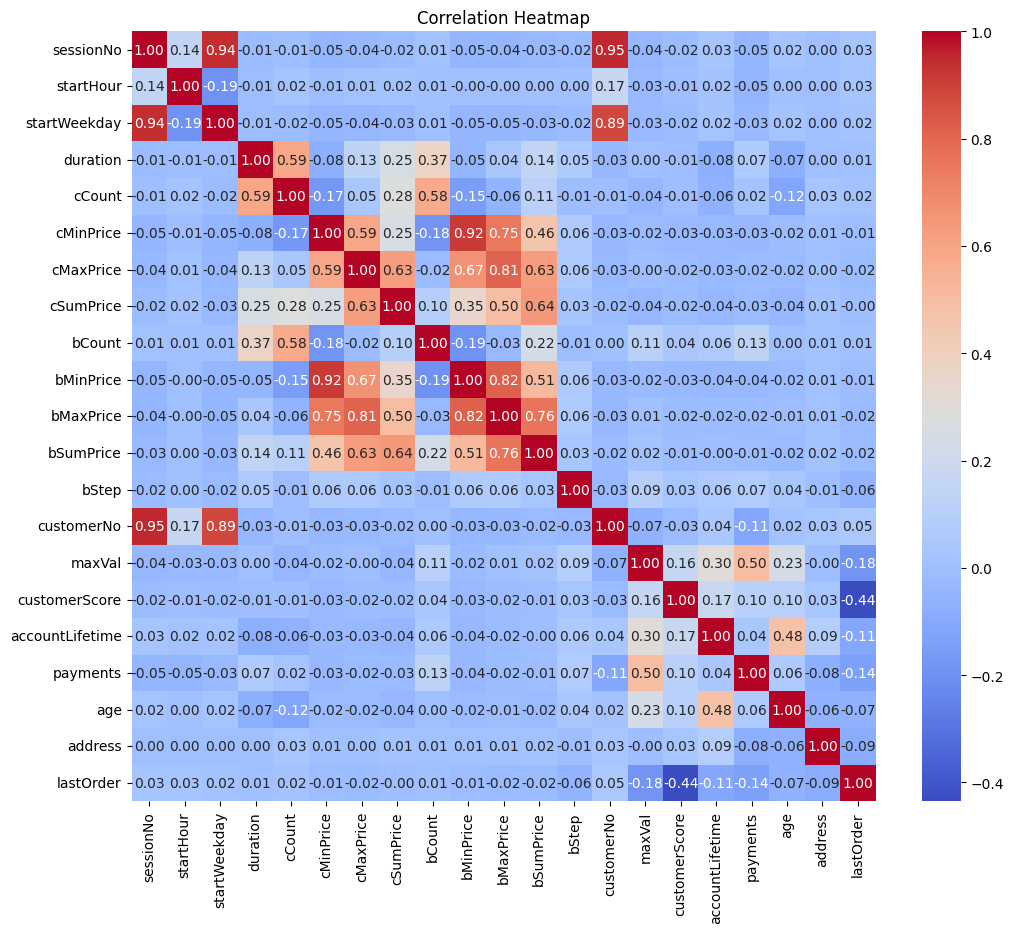

In [ ]:
# Menampilkan Heatmap untuk mencari korelasi antar kolom, bagaimana pola menarik yang ada pada dataset ini
df_numerik = df_data_train.select_dtypes(include=['number'])
correlation_matrix = df_numerik.corr()
plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

###Kesimpulan
####Korelasi Positif Kuat:

####sessionNo dan customerNo (0,95): Setiap sesi kemungkinan terkait pelanggan tertentu.
####bMaxPrice dengan bMinPrice (0,92), cSumPrice (0,76), dan bSumPrice (0,82): Harga maksimum tinggi cenderung terkait dengan harga dan jumlah harga yang lebih tinggi.
####Korelasi Negatif Kuat:

####sessionNo dan startWeekday (-0,94): Ketika salah satu naik, lainnya menurun.
####customerNo dan startWeekday (-0,89): Pelanggan tertentu aktif di hari tertentu.
####Korelasi Sedang:

####bCount dan cCount (0,58): Jumlah pada satu kategori cukup terkait dengan lainnya.
####accountLifetime dan age (0,48): Umur akun yang lebih lama mungkin terkait dengan usia pelanggan yang lebih tua.
####Korelasi Lemah atau Tidak Ada Korelasi:

####lastOrder, payments, dan address: Korelasi lemah dengan fitur lain, sehingga pengaruhnya mungkin rendah.

##Diagram batang untuk menunjukkan jumlah nilai 'y' dan 'n' di kolom "Order

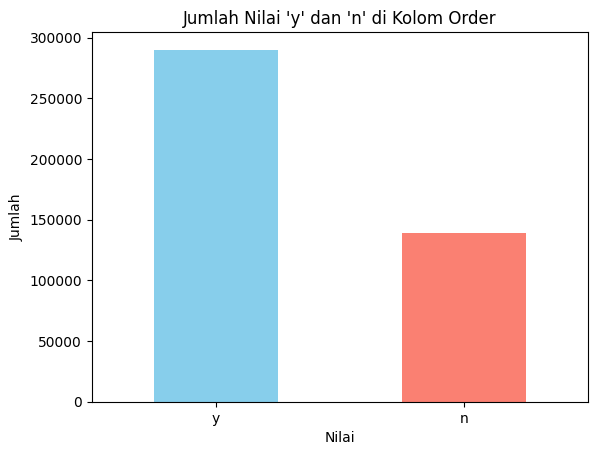

In [ ]:
# Menghitung jumlah masing-masing nilai 'y' dan 'n' di kolom 'order'
order_counts = df_data_train['order'].value_counts()

# Membuat plot batang
order_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Jumlah Nilai 'y' dan 'n' di Kolom Order")
plt.xlabel("Nilai")
plt.ylabel("Jumlah")
plt.xticks(rotation=0)  # Menjaga label sumbu x tetap horizontal
plt.show()

####Kesimpulan
####Nilai 'y' memiliki jumlah yang lebih tinggi dibandingkan dengan nilai 'n'.
####Ini menunjukkan bahwa terdapat lebih banyak entri dengan nilai 'y' dalam kolom "Order" daripada entri dengan nilai 'n'.
####Perbedaan jumlah antara nilai 'y' dan 'n' cukup signifikan, yang mungkin menunjukkan bahwa kondisi yang diwakili oleh 'y' lebih umum atau lebih sering terjadi dibandingkan dengan kondisi yang diwakili oleh 'n'

##Histogram untuk menunjukkan distribusi durasi sesi dalam satuan detik

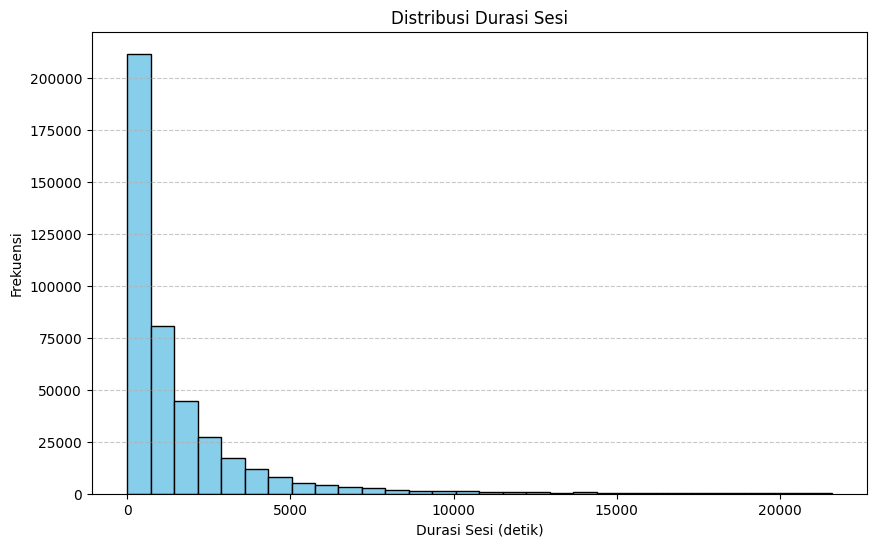

In [ ]:
# Ubah kolom duration ke tipe numerik, sambil menangani nilai yang bukan angka
df_data_train['duration'] = pd.to_numeric(df_data_train['duration'], errors='coerce')

# Buat histogram untuk duration: Plot histogram untuk melihat distribusi durasi sesi.
plt.figure(figsize=(10, 6))
plt.hist(df_data_train['duration'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("Distribusi Durasi Sesi")
plt.xlabel("Durasi Sesi (detik)")
plt.ylabel("Frekuensi")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# histogram untuk melihat distribusi waktu yang dihabiskan pengguna dalam satu sesi.
# banyak pengguna umumnya menghabiskan waktu singkat, dengan beberapa pengguna menghabiskan waktu lebih lama.

###Kesimpulan
####Sebagian besar durasi sesi berada di rentang yang sangat pendek (dekat dengan 0 detik), yang ditunjukkan oleh frekuensi tertinggi pada durasi sesi pendek.
####Distribusi durasi sesi tampak right-skewed atau miring ke kanan, yang berarti hanya sedikit sesi yang memiliki durasi sangat panjang, sedangkan sebagian besar sesi berlangsung singkat.
####Jumlah sesi dengan durasi lebih dari 5000 detik menurun tajam, menunjukkan bahwa sesi berdurasi panjang adalah kasus yang jarang terjadi.

##Plot batang untuk menunjukkan perbandingan antara rata-rata jumlah klik produk dan rata-rata jumlah produk yang ditambahkan ke keranjang

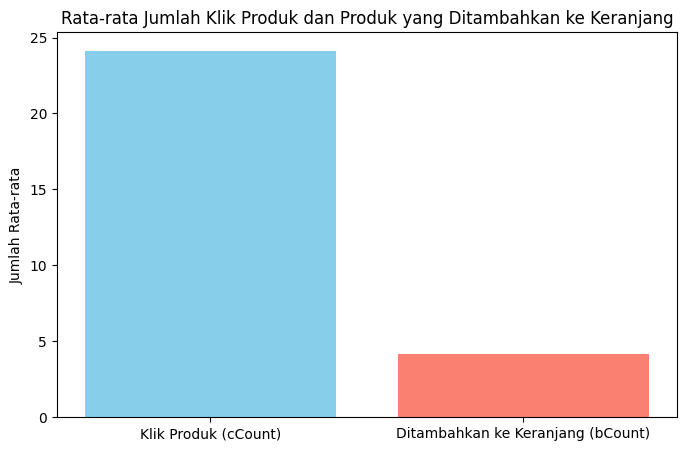

In [ ]:
# Konversi kolom 'cCount' dan 'bCount' ke numerik
df_data_train['cCount'] = pd.to_numeric(df_data_train['cCount'], errors='coerce')
df_data_train['bCount'] = pd.to_numeric(df_data_train['bCount'], errors='coerce')

# Menghitung rata-rata
avg_cCount = df_data_train['cCount'].mean()
avg_bCount = df_data_train['bCount'].mean()

# Plot batang untuk rata-rata cCount dan bCount
plt.figure(figsize=(8, 5))
plt.bar(['Klik Produk (cCount)', 'Ditambahkan ke Keranjang (bCount)'], [avg_cCount, avg_bCount], color=['skyblue', 'salmon'])
plt.title('Rata-rata Jumlah Klik Produk dan Produk yang Ditambahkan ke Keranjang')
plt.ylabel('Jumlah Rata-rata')
plt.show()

# Banyak pengguna yang hanya melihat-lihat produk dan tidak memasukkannya kedalam keranjang mereka

###Kesimpulan
####Rata-rata Jumlah Klik Produk Jauh Lebih Tinggi: Terlihat jelas bahwa rata-rata jumlah klik produk jauh lebih tinggi dibandingkan dengan rata-rata jumlah produk yang ditambahkan ke keranjang. Ini mengindikasikan bahwa banyak pengguna yang melihat-lihat produk (klik) tetapi tidak melanjutkan ke tahap pembelian (menambahkan ke keranjang).

####Tingkat Konversi Rendah: Perbedaan yang signifikan antara jumlah klik dan jumlah produk yang ditambahkan ke keranjang menunjukkan tingkat konversi yang relatif rendah. Dengan kata lain, persentase pengguna yang setelah melihat produk langsung menambahkannya ke keranjang masih cukup kecil.

##Plot batang untuk menunjukkan distribusi frekuensi usia pelanggan

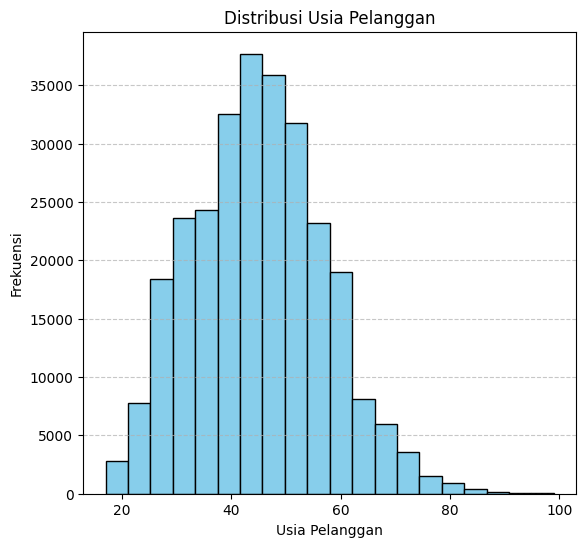

In [ ]:
# Konversi kolom 'age' dan 'payments' ke tipe numerik, menangani nilai non-numerik
df_data_train['age'] = pd.to_numeric(df_data_train['age'], errors='coerce')

# Mengatur ukuran figure
plt.figure(figsize=(14, 6))

# Histogram distribusi usia pelanggan
plt.subplot(1, 2, 1)
plt.hist(df_data_train['age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Usia Pelanggan')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# menampilkan rentang usia para pelanggan, ini bisa membantu mengetahui daya beli, minat terhadap produk, serta behaviour yang dapat membantu prediksi

###Kesimpulan
####Berdasarkan analisis di atas, dapat disimpulkan bahwa target pasar utama dari produk atau layanan ini adalah kelompok usia muda hingga dewasa, dengan fokus utama pada rentang usia 40 tahun. Hal ini dapat menjadi pertimbangan penting dalam menyusun strategi pemasaran dan pengembangan produk.

##Plot unutk menganalisis pembelian berdasarkan status online

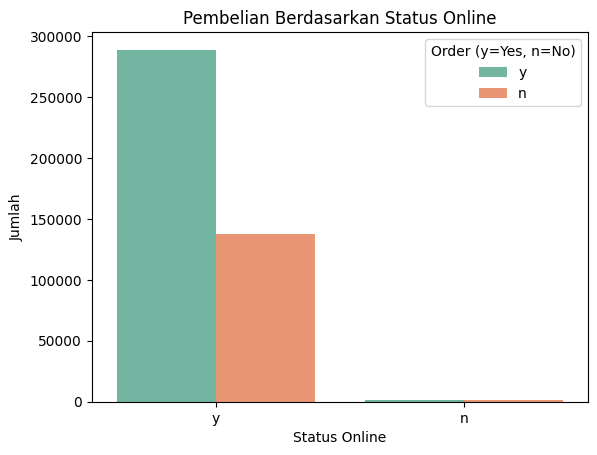

In [ ]:
sns.countplot(x='onlineStatus', hue='order', data=df_data_train, palette='Set2')
plt.title('Pembelian Berdasarkan Status Online')
plt.xlabel('Status Online')
plt.ylabel('Jumlah')
plt.legend(title='Order (y=Yes, n=No)')
plt.show()

# bisa dilihat bahwa ada beberapa order yang terjadi namun dalam kondisi atau status tidak online. hal ini bisa terjadi karena beberapa faktor:
# 1. kesalahan pencatatan dalam dataset, Misalnya, sistem mencatat status sebagai "offline" pada saat pembelian, padahal pengguna terhubung.
# 2. pemprosesan pesanan otomatis setelah pengguna melakukan tindakan awal, seperti "pre-order" atau "order confirmation."
# 3. Jika platform mendukung fitur seperti "cash on delivery", maka status pengguna di platform mungkin tetap offline.

###Kesimpulan
####Berdasarkan plot yang disajikan, dapat disimpulkan bahwa mayoritas pembelian terjadi melalui platform online. Hal ini ditunjukkan oleh batang berwarna hijau yang jauh lebih tinggi dibandingkan dengan batang berwarna oranye. Ini mengindikasikan bahwa fitur atau layanan online yang disediakan sangat efektif dalam mendorong konsumen untuk melakukan pembelian

#Prediksi Setelah Cleaning

##Model Random Forest

####Model ini dapat digunakan untuk memprediksi apakah seorang pelanggan akan melakukan order atau tidak berdasarkan fitur-fitur yang diberikan

In [148]:
# Mengimpor pustaka yang dibutuhkan untuk algoritma, evaluasi, dan manipulasi data
from sklearn.ensemble import RandomForestClassifier  # Digunakan untuk membuat model Random Forest
from sklearn.metrics import accuracy_score, classification_report  # Digunakan untuk mengevaluasi hasil model
import pandas as pd  # Digunakan untuk manipulasi dan analisis data

# 1. Persiapan dan Preprocessing Data
# Langkah pertama adalah menyiapkan data pelatihan dan data uji serta melakukan preprocessing

# Menyiapkan data fitur (X) dan label (y) untuk data pelatihan
X = df_data_train.drop('order', axis=1)  # Menghapus kolom 'order' dari df_data_train dan menyisakan fitur lainnya
y = df_data_train['order'].map({'n': 0, 'y': 1})  # Mengonversi kolom 'order' menjadi nilai numerik (0 untuk 'n', 1 untuk 'y')

# Melakukan pra-pemrosesan data pelatihan, seperti one-hot encoding dan konversi tipe data
categorical_features = ['onlineStatus', 'availability']  # Fitur kategorikal yang akan dikenakan one-hot encoding
X = pd.get_dummies(X, columns=categorical_features)  # Melakukan one-hot encoding pada fitur kategorikal di data pelatihan

# Mengonversi kolom-kolom tertentu ke tipe numerik di data pelatihan
for col in ['cMinPrice', 'cMaxPrice', 'cSumPrice', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 'bStep',
            'customerNo', 'maxVal', 'customerScore', 'accountLifetime', 'payments', 'age', 'address', 'lastOrder']:
    X[col] = pd.to_numeric(X[col], errors='coerce')  # Mengonversi kolom menjadi numerik, jika ada yang error (misalnya string), akan menjadi NaN

# Mengisi nilai NaN dengan 0 pada data pelatihan
X = X.fillna(0)  # Jika ada nilai yang hilang (NaN), diganti dengan 0

# Menyiapkan data uji (X_test) dan melakukan preprocessing yang sama seperti pada data pelatihan
X_test = df_data_class.copy()  # Menyalin df_data_class menjadi X_test untuk diproses

# Melakukan one-hot encoding pada data uji untuk fitur yang sama
X_test = pd.get_dummies(X_test, columns=categorical_features)  # Melakukan one-hot encoding pada data uji

# Mengonversi kolom-kolom tertentu menjadi numerik pada data uji
for col in ['cMinPrice', 'cMaxPrice', 'cSumPrice', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 'bStep',
            'customerNo', 'maxVal', 'customerScore', 'accountLifetime', 'payments', 'age', 'address', 'lastOrder']:
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')  # Mengubah kolom menjadi numerik

# Mengisi nilai NaN di data uji dengan 0
X_test = X_test.fillna(0)  # Mengisi nilai yang hilang dengan 0 pada data uji

# Menyesuaikan kolom antara data pelatihan dan data uji
missing_cols = set(X.columns) - set(X_test.columns)  # Mencari kolom yang ada di data pelatihan tetapi tidak ada di data uji
for col in missing_cols:
    X_test[col] = 0  # Menambahkan kolom yang hilang pada data uji dengan nilai 0

# Menghapus kolom-kolom yang tidak ada di data pelatihan tapi ada di data uji
extra_cols = set(X_test.columns) - set(X.columns)  # Mencari kolom yang ada di data uji tetapi tidak ada di data pelatihan
for col in extra_cols:
    X_test = X_test.drop(columns=[col])  # Menghapus kolom yang tidak ada di data pelatihan dari data uji

# Menyusun ulang kolom-kolom di data uji agar urutannya sama dengan data pelatihan
X_test = X_test[X.columns]  # Menyusun kolom pada data uji untuk mencocokkan urutan dengan data pelatihan

# 2. Pelatihan Model
# Sekarang data sudah siap, kita akan melatih model Random Forest menggunakan data pelatihan

# Membuat model Random Forest dengan 100 pohon keputusan dan kedalaman maksimal 3
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)  # Random Forest dengan 100 pohon keputusan dan kedalaman maksimal 3
model.fit(X, y)  # Melatih model dengan data pelatihan X (fitur) dan y (label)

# 3. Prediksi dan Evaluasi
# Setelah model dilatih, kita akan menggunakannya untuk memprediksi data uji dan mengevaluasi performanya

# Melakukan prediksi pada data uji (X_test)
predictions = model.predict(X_test)  # Prediksi kelas dari data uji menggunakan model yang telah dilatih

# Membuat DataFrame dengan nomor sesi dan hasil prediksi
df_predictions = df_data_class.copy()  # Menyalin data uji untuk menyimpan hasil prediksi
df_predictions['prediction'] = predictions  # Menambahkan kolom 'prediction' yang berisi hasil prediksi

# Menggabungkan hasil prediksi dengan data nyata dari df_data_real untuk perbandingan
df_comparison = df_predictions.merge(df_data_real, on='sessionNo', how='left', suffixes=('_model', '_real'))  # Menggabungkan data prediksi dengan data nyata berdasarkan sessionNo

# Menampilkan laporan klasifikasi untuk evaluasi model
report = classification_report(df_comparison['prediction_real'], df_comparison['prediction_model'])  # Laporan klasifikasi berdasarkan hasil prediksi dan nilai sebenarnya
print(report)  # Menampilkan laporan klasifikasi di konsol

# Menghitung dan menampilkan akurasi model berdasarkan hasil prediksi
accuracy = accuracy_score(df_comparison['prediction_real'], df_comparison['prediction_model'])  # Menghitung akurasi dengan membandingkan hasil prediksi dengan nilai sebenarnya
print(f"Overall Accuracy: {accuracy}")  # Menampilkan akurasi model pada data uji

# Hapus duplikat berdasarkan 'sessionNo', simpan baris pertama untuk setiap 'sessionNo'
df_predictions = df_predictions[['sessionNo', 'prediction']].drop_duplicates(subset=['sessionNo'], keep='first')

# Simpan hasil ke file TXT
df_predictions[['sessionNo', 'prediction']].to_csv('prediksi_sesudah_cleaning_RF.txt', sep='\t', index=False)


              precision    recall  f1-score   support

           0       0.69      0.40      0.51     14394
           1       0.77      0.91      0.83     30674

    accuracy                           0.75     45068
   macro avg       0.73      0.66      0.67     45068
weighted avg       0.74      0.75      0.73     45068

Overall Accuracy: 0.7502218869264223


###Output
####Akurasi: Model mencapai akurasi sebesar 0.750, artinya model dapat memprediksi dengan benar sekitar 75% dari data uji.
####Prediksi untuk Kelas: Model memiliki performa yang baik dalam memprediksi kelas 1 (dengan f1-score 0.83) tetapi kurang optimal pada kelas 0 (dengan f1-score 0.51), menunjukkan bahwa model lebih efektif menangani kelas mayoritas.

## Model XGBoost

###Model ini untuk memprediksi apakah pelanggan akan melakukan order (y) atau tidak (n)

In [149]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# 1. Data Preparation and Preprocessing

# Memisahkan data fitur (X) dan target (y) dalam data pelatihan
X = df_data_train.drop('order', axis=1)  # Menghapus kolom 'order' dari data pelatihan
y = df_data_train['order'].map({'n': 0, 'y': 1})  # Mengonversi target 'order' menjadi angka: 'n' -> 0, 'y' -> 1

# Memproses data pelatihan: one-hot encoding untuk fitur kategorikal, konversi tipe data, dan penanganan nilai yang hilang
categorical_features = ['onlineStatus', 'availability']
X = pd.get_dummies(X, columns=categorical_features)  # Melakukan one-hot encoding pada fitur kategorikal

# Mengonversi kolom numerik ke tipe data numerik pada data pelatihan
for col in ['cMinPrice', 'cMaxPrice', 'cSumPrice', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 'bStep',
            'customerNo', 'maxVal', 'customerScore', 'accountLifetime', 'payments', 'age', 'address', 'lastOrder']:
    X[col] = pd.to_numeric(X[col], errors='coerce')  # Mengonversi kolom menjadi angka, jika gagal set menjadi NaN

# Mengisi nilai NaN pada data pelatihan dengan 0
X = X.fillna(0)

# Mempersiapkan Data Uji
X_test = df_data_class.copy()  # Menyalin data uji untuk diproses lebih lanjut

# Memproses data uji dengan cara yang sama seperti data pelatihan
X_test = pd.get_dummies(X_test, columns=categorical_features)  # One-hot encoding pada fitur kategorikal

# Mengonversi kolom numerik ke tipe data numerik pada data uji
for col in ['cMinPrice', 'cMaxPrice', 'cSumPrice', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 'bStep',
            'customerNo', 'maxVal', 'customerScore', 'accountLifetime', 'payments', 'age', 'address', 'lastOrder']:
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')  # Mengonversi kolom menjadi angka, jika gagal set menjadi NaN

# Mengisi nilai NaN pada data uji dengan 0
X_test = X_test.fillna(0)

# Menyelaraskan kolom antara data pelatihan dan data uji (kolom yang hilang ditambahkan, kolom yang ekstra dihapus)
missing_cols = set(X.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0  # Menambahkan kolom yang hilang pada data uji

extra_cols = set(X_test.columns) - set(X.columns)
for col in extra_cols:
    X_test = X_test.drop(columns=[col])  # Menghapus kolom ekstra pada data uji

X_test = X_test[X.columns]  # Menyusun ulang kolom agar urutannya sama dengan data pelatihan

# 2. Model Training

# Membuat dan melatih model XGBoost
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=3, learning_rate=0.1)
model.fit(X, y)

# 3. Prediction and Evaluation

# Melakukan prediksi pada data uji
predictions = model.predict(X_test)

# Membuat DataFrame dengan sessionNo dan prediksi
df_predictions = df_data_class.copy()
df_predictions['prediction'] = predictions

# Menggabungkan dengan df_data_real untuk perbandingan (diasumsikan df_data_real berisi data kebenaran)
df_comparison = df_predictions.merge(df_data_real, on='sessionNo', how='left', suffixes=('_model', '_real'))

# Mencetak classification report
report = classification_report(df_comparison['prediction_real'], df_comparison['prediction_model'])
print(report)

# Menampilkan akurasi pelatihan
training_accuracy = model.score(X, y)
print(f"Training Accuracy: {training_accuracy}")

# Menghitung akurasi keseluruhan
accuracy = accuracy_score(df_comparison['prediction_real'], df_comparison['prediction_model'])
print(f"Overall Accuracy: {accuracy}")

# Hapus duplikat berdasarkan 'sessionNo', simpan baris pertama untuk setiap 'sessionNo'
df_predictions = df_predictions[['sessionNo', 'prediction']].drop_duplicates(subset=['sessionNo'], keep='first')

# Simpan hasil ke file TXT
df_predictions[['sessionNo', 'prediction']].to_csv('prediksi_sesudah_cleaning_XGboost.txt', sep='\t', index=False)


              precision    recall  f1-score   support

           0       0.66      0.54      0.59     14394
           1       0.80      0.87      0.83     30674

    accuracy                           0.76     45068
   macro avg       0.73      0.70      0.71     45068
weighted avg       0.75      0.76      0.76     45068

Training Accuracy: 0.751049501996443
Overall Accuracy: 0.7626031774207863


###Output
####Akurasi: Model mencapai akurasi sebesar 0.763, artinya model dapat memprediksi dengan benar sekitar 76% dari data uji.
####Prediksi untuk Kelas: Model lebih unggul dalam memprediksi kelas 1 (dengan f1-score 0.83) dibandingkan kelas 0 (dengan f1-score 0.59), menunjukkan performa yang lebih baik pada kelas mayoritas.
####Akurasi Training: Model memiliki akurasi training sebesar 0.751, menunjukkan performa yang cukup konsisten antara data training dan data uji.